Biomarker Discovery - Assingment 1 | Group 6: Tania J. González Robles, Sion Hao, Nicholas Stitt, Garrett Yoon

# Heatmap


In [ ]:
# http://portals.broadinstitute.org/cgi-bin/cancer/publications/pub_paper.cgi?mode=view&paper_id=43

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv("http://pubs.broadinstitute.org/mpr/projects/Leukemia/data_set_ALL_AML_train.tsv", sep='\t') 
test_df = pd.read_csv("http://pubs.broadinstitute.org/mpr/projects/Leukemia/data_set_ALL_AML_independent.tsv", sep='\t')

train_cols = train_df.columns
train_df = train_df.reset_index().drop(columns='call.37')
train_df.columns = train_cols
sample_count = 38
absent_probes = ((train_df.iloc[:, 3::2] == 'A').sum(axis=1)/sample_count <= 0.77) 
train_df = train_df[absent_probes].reset_index()
train_df = train_df.loc[train_df["Gene Accession Number"].str.contains("AFFX") == False]
train_df.shape

(3026, 79)

In [ ]:
train_df_nums = train_df[['Gene Accession Number',
            '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
            '16','17','18','19','20','21','22','23','24','25','26','27','28',
            '29','30','31','32','33','34','35','36','37','38'
           ]].set_index("Gene Accession Number")

In [ ]:
train_df_std = train_df_nums.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
train_df_std

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
hum_alu_at,4.333933,2.738356,4.473594,4.369789,4.921663,9.684269,8.767309,7.127520,3.799750,6.006359,4.948715,7.814343,5.362032,3.953814,2.963457,4.621604,3.470225,6.763184,5.764061,1.168282,5.660440,6.929528,10.430524,4.055238,4.982702,3.465569,7.284325,4.818647,7.200626,2.936529,6.642762,4.867064,5.242029,4.512175,12.496779,6.010910,4.468110,5.158651
A28102_at,-0.409755,-0.378563,-0.440471,-0.276942,-0.412316,-0.293133,-0.260858,-0.148380,-0.483792,-0.337478,-0.380968,-0.232310,-0.440483,-0.372001,-0.462983,-0.345824,-0.493832,-0.346193,-0.259391,-0.405301,-0.348974,-0.318331,-0.262173,-0.386672,-0.267702,-0.373906,-0.215950,-0.388414,-0.269729,-0.358310,-0.266474,-0.340722,-0.388665,-0.320220,-0.202654,-0.451230,-0.367897,-0.299410
AB000115_at,-0.368478,-0.382324,-0.360563,-0.388252,-0.388919,-0.351639,-0.347143,-0.321024,-0.445491,-0.361260,-0.374758,-0.284694,-0.426924,-0.387170,-0.417537,-0.376554,-0.472194,-0.312194,-0.316242,0.013693,-0.309540,-0.326417,-0.294152,-0.364721,0.065959,-0.378450,-0.307366,-0.381348,-0.332142,-0.398923,-0.346004,-0.335694,-0.085369,-0.355301,-0.239890,-0.444718,-0.345568,-0.380498
AB000409_at,-0.552637,-0.484437,-0.424489,-0.427484,-0.377072,-0.405441,-0.371244,-0.565602,-0.459572,-0.401777,-0.460215,-0.301252,-0.465190,-0.450522,-0.425800,-0.407284,-0.488707,-0.362889,-0.362452,-0.574515,-0.339999,-0.412969,-0.385942,-0.348784,-0.370232,-0.388748,-0.377342,-0.459655,-0.350720,-0.359730,-0.416531,-0.464646,-0.565249,-0.362671,-0.382064,-0.346490,-0.478692,-0.376486
AB000449_at,-0.439601,-0.405755,-0.360267,-0.340808,-0.355156,-0.304305,-0.358152,-0.388762,-0.413104,-0.334542,-0.332473,-0.292823,-0.167803,-0.342555,-0.321924,-0.383483,-0.420092,-0.321908,-0.298001,-0.358417,-0.216259,-0.347681,-0.312806,-0.337658,-0.329806,-0.325444,-0.301708,-0.391946,-0.309499,-0.439537,-0.376316,-0.444830,-0.390114,-0.392446,-0.305053,-0.441462,-0.400683,-0.369896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M93143_at,-0.335773,-0.387820,-0.253426,-0.330772,-0.394546,-0.259618,-0.304298,-0.276364,-0.336501,-0.319275,-0.372097,-0.312994,-0.380222,-0.352371,-0.339630,-0.359984,-0.268624,-0.257857,-0.322626,-0.465927,-0.300022,-0.316534,-0.284084,-0.285938,-0.323361,-0.309390,-0.216546,-0.326887,-0.348978,-0.412272,-0.320494,-0.394846,-0.325744,-0.269514,-0.219015,-0.347575,-0.367897,-0.355856
U29175_at,0.044611,-0.274136,-0.243660,-0.198173,-0.261863,-0.032357,-0.232889,-0.238299,-0.001084,-0.172474,0.159866,-0.274458,-0.062045,-0.218527,0.013903,0.204305,-0.263215,-0.234483,0.120020,0.008304,0.646657,-0.267718,0.055244,-0.014107,-0.272389,0.188566,-0.077784,-0.318056,-0.270890,-0.407728,-0.296785,-0.251993,-0.392144,-0.281896,-0.225785,-0.353002,-0.327196,-0.319754
U48730_at,-0.398959,-0.405755,-0.373289,-0.351148,-0.401062,-0.338703,-0.388204,-0.323122,-0.400994,-0.382105,-0.368549,-0.325939,-0.396191,-0.356832,-0.433473,-0.397342,-0.455681,-0.315533,-0.287969,-0.516853,-0.333472,-0.308748,-0.314286,-0.399001,-0.350312,-0.354218,-0.324637,-0.393418,-0.311821,-0.402900,-0.401525,-0.352552,-0.403452,-0.339087,-0.309848,-0.401302,-0.397009,-0.372188


In [ ]:
sample_data = pd.DataFrame(np.zeros((38, 3)))
sample_data.columns = ['ALL/AML', "T/B-Cell", 'FAB']
sample_data['ALL/AML'] = np.array(['ALL'] * 27 + ['AML'] * 11)

sample_data['T/B-Cell'] = np.array(['B', 'T', 'T', 'B', 'B', 'T', 'B', 'B', 
                                    'T', 'T', 'T', 'B', 'B', 'T', 'B','B' ,
                                    'B' ,'B' ,'B' ,'B', 'B', 'B', 'T', 'B', 
                                    'B', 'B' ,'B'] + [None] * 11)

sample_data['FAB'] = np.array([None] * 27 + ['M2', 'M2', 'M5', 'M4', 'M1',
                                             'M2', 'M2', 'M1', 'M5', 'M2',
                                             'M1'])

# Start index at 1
sample_data.index = sample_data.index + 1
sample_data

,ALL/AML,T/B-Cell,FAB
1,ALL,B,None
2,ALL,T,None
3,ALL,T,None
4,ALL,B,None
5,ALL,B,None
6,ALL,T,None
7,ALL,B,None
8,ALL,B,None
9,ALL,T,None
10,ALL,T,None


In [ ]:
# Create sample list for ALL and AML

samples_ALL = [str(x) for x in (list(range(1,28)))]
samples_AML = [str(x) for x in (list(range(28,39)))]

print(samples_ALL)
print(samples_AML)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']
['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']


In [ ]:
print('NA values in DF:', train_df_nums.isna().sum().sum())

NA values in DF: 0


In [ ]:
# add two new columns containing the mean and std for each row respectively
train_df_std[['ALL_mean', 'ALL_std']] = train_df_std[samples_ALL].agg(
    ['mean', 'std'], axis=1
)

train_df_std[['AML_mean', 'AML_std']] = train_df_std[samples_AML].agg(
    ['mean', 'std'], axis=1
)

train_df_std

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,ALL_mean,ALL_std,AML_mean,AML_std
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
hum_alu_at,4.333933,2.738356,4.473594,4.369789,4.921663,9.684269,8.767309,7.127520,3.799750,6.006359,4.948715,7.814343,5.362032,3.953814,2.963457,4.621604,3.470225,6.763184,5.764061,1.168282,5.660440,6.929528,10.430524,4.055238,4.982702,3.465569,7.284325,4.818647,7.200626,2.936529,6.642762,4.867064,5.242029,4.512175,12.496779,6.010910,4.468110,5.158651,5.402244,2.159548,5.850389,2.484419
A28102_at,-0.409755,-0.378563,-0.440471,-0.276942,-0.412316,-0.293133,-0.260858,-0.148380,-0.483792,-0.337478,-0.380968,-0.232310,-0.440483,-0.372001,-0.462983,-0.345824,-0.493832,-0.346193,-0.259391,-0.405301,-0.348974,-0.318331,-0.262173,-0.386672,-0.267702,-0.373906,-0.215950,-0.388414,-0.269729,-0.358310,-0.266474,-0.340722,-0.388665,-0.320220,-0.202654,-0.451230,-0.367897,-0.299410,-0.346470,0.086592,-0.332157,0.069834
AB000115_at,-0.368478,-0.382324,-0.360563,-0.388252,-0.388919,-0.351639,-0.347143,-0.321024,-0.445491,-0.361260,-0.374758,-0.284694,-0.426924,-0.387170,-0.417537,-0.376554,-0.472194,-0.312194,-0.316242,0.013693,-0.309540,-0.326417,-0.294152,-0.364721,0.065959,-0.378450,-0.307366,-0.381348,-0.332142,-0.398923,-0.346004,-0.335694,-0.085369,-0.355301,-0.239890,-0.444718,-0.345568,-0.380498,-0.332754,0.116839,-0.331405,0.096029
AB000409_at,-0.552637,-0.484437,-0.424489,-0.427484,-0.377072,-0.405441,-0.371244,-0.565602,-0.459572,-0.401777,-0.460215,-0.301252,-0.465190,-0.450522,-0.425800,-0.407284,-0.488707,-0.362889,-0.362452,-0.574515,-0.339999,-0.412969,-0.385942,-0.348784,-0.370232,-0.388748,-0.377342,-0.459655,-0.350720,-0.359730,-0.416531,-0.464646,-0.565249,-0.362671,-0.382064,-0.346490,-0.478692,-0.376486,-0.421948,0.068292,-0.414812,0.069483
AB000449_at,-0.439601,-0.405755,-0.360267,-0.340808,-0.355156,-0.304305,-0.358152,-0.388762,-0.413104,-0.334542,-0.332473,-0.292823,-0.167803,-0.342555,-0.321924,-0.383483,-0.420092,-0.321908,-0.298001,-0.358417,-0.216259,-0.347681,-0.312806,-0.337658,-0.329806,-0.325444,-0.301708,-0.391946,-0.309499,-0.439537,-0.376316,-0.444830,-0.390114,-0.392446,-0.305053,-0.441462,-0.400683,-0.369896,-0.337455,0.057166,-0.387435,0.047379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M93143_at,-0.335773,-0.387820,-0.253426,-0.330772,-0.394546,-0.259618,-0.304298,-0.276364,-0.336501,-0.319275,-0.372097,-0.312994,-0.380222,-0.352371,-0.339630,-0.359984,-0.268624,-0.257857,-0.322626,-0.465927,-0.300022,-0.316534,-0.284084,-0.285938,-0.323361,-0.309390,-0.216546,-0.326887,-0.348978,-0.412272,-0.320494,-0.394846,-0.325744,-0.269514,-0.219015,-0.347575,-0.367897,-0.355856,-0.320985,0.052590,-0.335371,0.054337
U29175_at,0.044611,-0.274136,-0.243660,-0.198173,-0.261863,-0.032357,-0.232889,-0.238299,-0.001084,-0.172474,0.159866,-0.274458,-0.062045,-0.218527,0.013903,0.204305,-0.263215,-0.234483,0.120020,0.008304,0.646657,-0.267718,0.055244,-0.014107,-0.272389,0.188566,-0.077784,-0.318056,-0.270890,-0.407728,-0.296785,-0.251993,-0.392144,-0.281896,-0.225785,-0.353002,-0.327196,-0.319754,-0.070303,0.214367,-0.313203,0.056073
U48730_at,-0.398959,-0.405755,-0.373289,-0.351148,-0.401062,-0.338703,-0.388204,-0.323122,-0.400994,-0.382105,-0.368549,-0.325939,-0.396191,-0.356832,-0.433473,-0.397342,-0.455681,-0.315533,-0.287969,-0.516853,-0.333472,-0.308748,-0.314286,-0.399001,-0.350312,-0.354218,-0.324637,-0.393418,-0.311821,-0.402900,-0.401525,-0.352552,-0.403452,-0.339087,-0.309848,-0.401302,-0.397009,-0.372188,-0.370458,0.050370,-0.371373,0.037014


In [ ]:
def welch_t_test(row):
    return (
        (row['ALL_mean'] - row['AML_mean']) / 
        np.sqrt(
            row['ALL_std']**2/len(samples_ALL) + row['AML_std']**2/len(samples_AML)
        )
    )

train_df_std['similarity'] = train_df_std[['AML_mean', 'AML_std', 'ALL_mean', 'ALL_std']].apply(welch_t_test, axis=1)
train_df_sorted = train_df_std.sort_values('similarity', ascending=False).drop(columns=['ALL_mean', 'ALL_std', 'AML_mean', 'AML_std', 'similarity'])
train_df_sorted

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U22376_cds2_s_at,0.528187,-0.131235,0.878016,1.238515,0.580141,0.600326,0.773976,1.012467,0.648066,0.092354,0.420377,-0.174507,0.969620,0.020011,1.098406,0.882175,1.512824,-0.014402,0.657214,1.273637,2.134257,1.092248,0.560980,1.296635,0.157650,0.577179,0.496320,-0.210606,0.018821,-0.329056,-0.289883,-0.145814,-0.366918,-0.083789,-0.087843,-0.336450,-0.385703,-0.206862
X59417_at,0.499928,0.535829,1.819455,0.737924,1.097546,0.860514,1.247655,0.211593,1.690366,1.133463,1.510916,-0.085696,1.872629,0.086040,1.681825,1.411817,0.174674,0.014437,1.585981,1.478149,1.201176,-0.146726,0.370885,0.702757,0.745292,0.576270,0.178597,-0.090203,0.091103,-0.004429,0.123075,-0.096422,-0.005050,-0.185200,-0.197858,-0.017617,-0.289040,-0.373334
X74262_at,-0.022068,-0.112143,0.190805,-0.104503,-0.041514,0.011448,0.001272,-0.213421,0.510632,-0.083807,-0.141452,-0.277469,0.028949,0.173485,0.119845,0.068430,0.369417,-0.104255,0.058913,0.568488,-0.152622,-0.303357,-0.097246,-0.028240,-0.247489,-0.194897,-0.211484,-0.268894,-0.272342,-0.377907,-0.329798,-0.363495,-0.458544,-0.333486,-0.241300,-0.412156,-0.401531,-0.387088
D26156_s_at,0.048738,-0.216860,-0.036786,-0.225240,-0.147839,0.093180,-0.225153,-0.102822,-0.135983,-0.109350,0.142420,-0.241342,0.019608,-0.135545,0.051381,0.200991,-0.018077,-0.140075,0.055568,0.012884,-0.152622,0.040153,0.237345,-0.088079,-0.174547,0.237332,0.010356,-0.181462,-0.180900,-0.356606,-0.282680,-0.246669,-0.250645,-0.326705,-0.279383,-0.283809,-0.241273,-0.195114
M91432_at,-0.214165,-0.219174,-0.008670,-0.171410,-0.025818,-0.246094,-0.169811,-0.184348,-0.000802,-0.269363,-0.283683,-0.317509,-0.183169,-0.256003,-0.050724,-0.159334,0.053955,-0.082399,-0.222909,0.282603,-0.117811,-0.335102,-0.257435,-0.153631,-0.284400,-0.219128,-0.235603,-0.349261,-0.325755,-0.421929,-0.323796,-0.346637,-0.432158,-0.338203,-0.272330,-0.441190,-0.386551,-0.369896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X17042_at,-0.401499,0.546243,-0.343397,-0.304921,1.913784,-0.196996,-0.277222,-0.367781,-0.262434,-0.073237,-0.026129,1.240762,0.265171,0.314764,0.160569,-0.049971,-0.196877,0.001991,0.077154,-0.528978,0.158496,-0.250048,-0.299777,0.055354,0.696371,0.118295,-0.273718,1.868921,2.209649,2.658196,1.343040,0.508412,2.103524,2.095388,0.687342,2.412300,1.958248,-0.033513
M16038_at,-0.341806,-0.274136,-0.434552,-0.158637,-0.244093,-0.283725,-0.300430,-0.336610,-0.424369,-0.352158,-0.413199,-0.220268,-0.375703,-0.261060,-0.216867,-0.334074,-0.372260,-0.208073,-0.371269,-0.411498,-0.239919,-0.284489,-0.349818,-0.297064,-0.376091,-0.330593,-0.216546,-0.244460,0.016789,0.298329,-0.103812,0.337166,0.470481,0.077763,-0.128746,0.275167,0.239784,-0.177063
M62762_at,-0.192574,0.434005,-0.286277,-0.139781,0.045855,-0.225808,-0.169811,-0.013203,-0.010941,-0.045639,0.129705,-0.030301,-0.013836,-0.170939,-0.083481,-0.242486,0.152181,-0.207466,-0.138697,0.089408,0.050258,0.236017,-0.153505,-0.080561,-0.117423,-0.074345,-0.363049,0.351078,0.141904,0.542297,0.564543,0.801217,0.078458,0.538244,-0.018731,0.796154,0.638027,0.628079


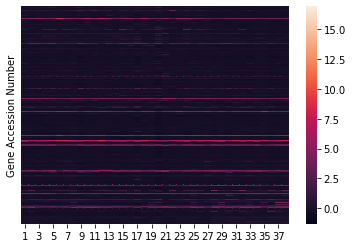

In [ ]:
_ = sns.heatmap(data=train_df_sorted, yticklabels=False)

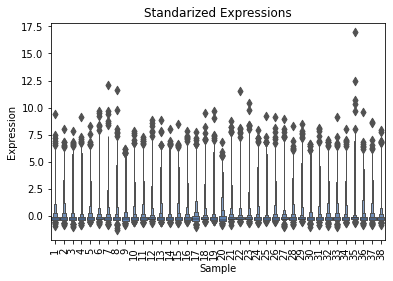

In [ ]:
sns.boxenplot(data=train_df_sorted, color='#507fbf')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Sample')
_ = plt.ylabel('Expression')
_ = plt.title('Standarized Expressions')

In [ ]:
train_df_features = train_df_sorted.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
train_df_features = train_df_features.head(25).append(train_df_features.tail(25))
train_df_features

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U22376_cds2_s_at,0.139316,-0.914159,0.698193,1.274115,0.222317,0.254563,0.531982,0.912987,0.330830,-0.556959,-0.032919,-0.983290,0.844537,-0.672532,1.050283,0.704837,1.712345,-0.727509,0.345446,1.330226,2.705129,1.040443,0.191705,1.366967,-0.452644,0.217583,0.088406,-1.040960,-0.674434,-1.230193,-1.167610,-0.937450,-1.290679,-0.838360,-0.844837,-1.242005,-1.320690,-1.034979
X59417_at,-0.119281,-0.067639,1.778819,0.223069,0.740375,0.399411,0.956302,-0.534043,1.593129,0.792040,1.334994,-0.961684,1.855308,-0.714647,1.580842,1.192443,-0.587151,-0.817647,1.442973,1.287860,0.889443,-1.049474,-0.304906,0.172482,0.233667,-0.009466,-0.581506,-0.968168,-0.707364,-0.844784,-0.661374,-0.977113,-0.845678,-1.104819,-1.123027,-0.863755,-1.254188,-1.375444
X74262_at,0.348433,-0.019409,1.217747,0.011791,0.269018,0.485304,0.443748,-0.433004,2.523834,0.096308,-0.139098,-0.694556,0.556771,1.147017,0.927967,0.718001,1.947152,0.012801,0.679135,2.760105,-0.184713,-0.800275,0.041424,0.323228,-0.572127,-0.357353,-0.425090,-0.659538,-0.673617,-1.104716,-0.908253,-1.045865,-1.434020,-0.923314,-0.546853,-1.244582,-1.201193,-1.142210
D26156_s_at,0.939374,-0.730475,0.401672,-0.783167,-0.296531,1.218783,-0.782618,-0.013505,-0.221994,-0.054548,1.528361,-0.884399,0.756230,-0.219236,0.955991,1.896607,0.519297,-0.247723,0.982316,0.713955,-0.326602,0.885400,2.125166,0.079186,-0.464448,2.125089,0.698062,-0.507925,-0.504391,-1.609076,-1.144296,-0.917892,-0.942886,-1.421090,-1.123565,-1.151393,-0.883966,-0.593760
M91432_at,0.035488,0.001946,1.411598,0.321797,1.296768,-0.178325,0.332504,0.235160,1.464284,-0.334146,-0.430043,-0.656565,0.243052,-0.244686,1.129979,0.402665,1.830972,0.917867,-0.023070,3.362125,0.680727,-0.774377,-0.254276,0.440857,-0.434846,0.002252,-0.108074,-0.869189,-0.711783,-1.355814,-0.698661,-0.851619,-1.424318,-0.795139,-0.354020,-1.484801,-1.118907,-1.007376
M92287_at,0.785208,-0.269614,0.687318,1.014966,0.083181,0.069587,0.392463,0.091396,1.507599,-0.176300,1.261787,-0.338418,3.224196,-0.548728,2.497564,0.104869,-0.526873,-0.699756,-0.202605,0.936092,-1.054438,0.150253,0.370924,0.381469,-0.589594,0.936449,-0.151922,-0.835232,-0.623252,-1.079606,-0.886979,-0.958939,-0.644770,-1.126312,-1.155976,-0.897041,-1.023476,-0.705489
X15414_at,1.593980,-0.484767,1.460706,-0.043050,1.085389,0.680164,0.292108,0.501583,0.163837,0.663619,-0.292278,-0.573462,1.186533,0.004337,1.369158,1.700252,-1.570241,0.419799,-0.180174,1.125459,0.478448,-0.663412,0.940496,0.373418,0.045220,0.984099,0.514495,-0.209711,-1.652737,-0.039857,-1.505332,-0.780453,-1.389317,-1.060275,-0.922127,-0.721568,-1.701099,-1.793240
L47738_at,-0.536376,2.202942,2.024722,-0.226206,-0.447591,1.335799,-0.692017,1.048214,1.325553,0.087578,1.493340,-0.627227,-0.604777,0.633347,0.510247,-0.005632,-0.806006,-0.089331,0.451082,2.481178,0.954576,0.199758,0.148400,-0.142079,-0.740232,-0.143228,0.227767,-0.685150,-0.814102,-1.125122,-0.803410,-0.441022,-1.132350,-1.101189,-0.528843,-1.310930,-1.303690,-0.817995
L07758_at,-0.314608,-1.125072,0.773226,1.293598,1.561316,0.550615,0.107941,0.214042,0.578677,0.375967,0.628346,-0.053767,-0.324001,0.925022,-0.137163,0.999152,-1.780134,0.404414,0.109865,1.662871,1.713180,0.631820,0.855311,0.732109,-0.554788,0.203172,1.344250,-0.765185,-0.478868,-2.191023,-1.399112,-1.198741,-1.247691,-0.925727,-0.169458,-0.727790,-1.512731,-0.759034


[Text(0.5, 1.0, '50 Top Correlated Genes')]

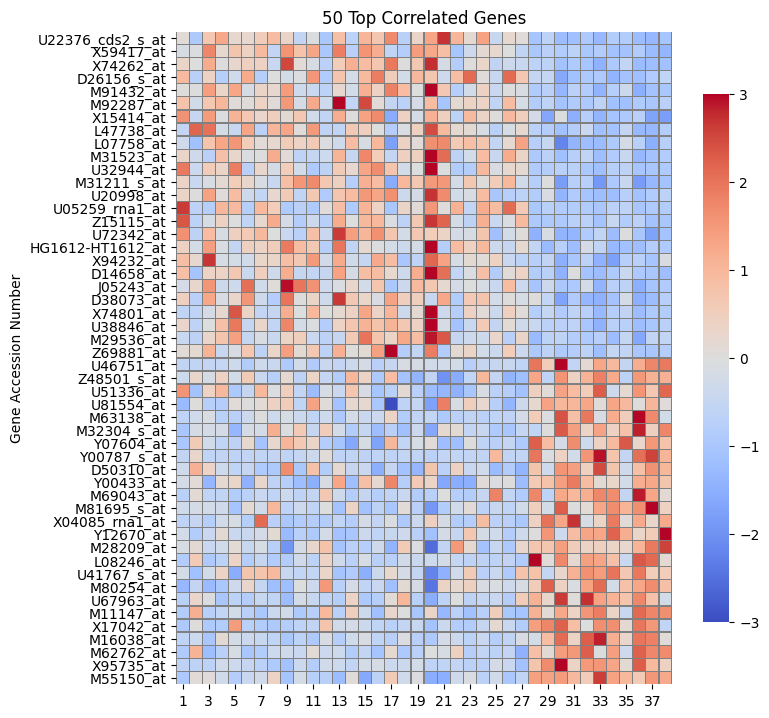

In [ ]:
fig = plt.figure(figsize=(8, 14), dpi=100)
ax = sns.heatmap(data=train_df_features, cmap='coolwarm', vmin=-3, vmax=3, square = 1, linewidth=0.1,
    linecolor='gray', cbar_kws={"shrink": 0.5})
ax.set(title="50 Top Correlated Genes")

# Prediction Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import LeaveOneOut

# Create samples labels
SAMPLES = dict([(str(x), 'ALL') for x in range(1,28)])
z = dict([(str(x), 'AML') for x in range(28,39)])
SAMPLES.update(z)

In [ ]:
# Create df with selected features and labels

train_df_features = train_df_sorted.apply(lambda x: (x - x.mean()) / x.std(), axis=1).rename_axis(index=None)
train_df_features = train_df_features.head(25).append(train_df_features.tail(25)).T # How far each gene is far from the mean of each probe
train_df_features['label'] = pd.Series(SAMPLES).astype('category')
train_df_features['label_codes'] = train_df_features["label"].cat.codes
train_df_features[["label", 'label_codes']]

,label,label_codes
1,ALL,0
2,ALL,0
3,ALL,0
4,ALL,0
5,ALL,0
6,ALL,0
7,ALL,0
8,ALL,0
9,ALL,0
10,ALL,0


In [ ]:
# Training using top 50 most correlated genes

X_train, X_test, y_train, y_test = train_test_split(
    train_df_features.drop(columns=['label', 'label_codes']), 
    train_df_features['label_codes'], 
    test_size=0.92, 
    random_state=42)

In [ ]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
clf = lr.fit(X_train, y_train)
pred = clf.predict(X_test)
y_scores = clf.decision_function(X_test)
print('Predicted Class:\t', pred)
print('Actual Class: \t\t', y_test.to_numpy())

# y_scores contains the confidence scores
#y_scores
#clf.score(X_test, y_test)

Predicted Class:	 [1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0]
Actual Class: 		 [1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0]


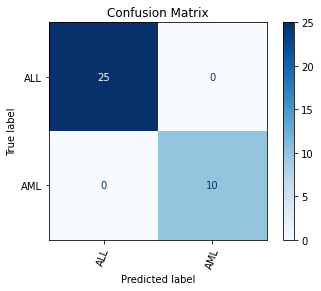

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=train_df_features['label'].cat.categories,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion Matrix')
disp.ax_.grid(False)
disp.ax_.tick_params(axis='x', rotation=70)

_ = disp.confusion_matrix

In [ ]:
loo = LeaveOneOut()

loo.get_n_splits(train_df_features)

max_probs = []

for train_index, test_index in loo.split(train_df_features):
    # split the data into train and test sets using the indicies
    train_df_features, 
    train_df_features
    X_train = train_df_features.iloc[train_index].drop(columns=['label', 'label_codes'])
    X_test = train_df_features.iloc[test_index].drop(columns=['label', 'label_codes'])
    y_train = train_df_features.iloc[train_index]['label_codes']
    y_test = train_df_features.iloc[test_index]['label_codes']
    
    # Create a new model each time so that the weights are reset each iteration 
    lr = LogisticRegression(solver='lbfgs')
    # train the model using the training set
    clf = lr.fit(X_train, y_train)
    # print the accuracy of the model using the test set
    #print(clf.score(X_test, y_test), end=', ')
    # this will output the probilites per test case
    #   as we only have one test we can use zero to index it
    max_probs.append(max(clf.predict_proba(X_test)[0]))

probs_50 = max_probs

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


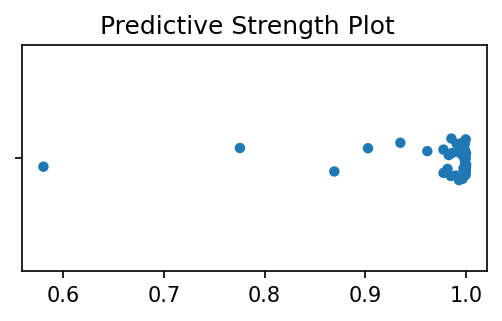

In [ ]:
fig = plt.figure(figsize=(4, 2), dpi=150)
fig.suptitle('Predictive Strength Plot')
g = sns.stripplot(max_probs, orient='v')

## 2 genes

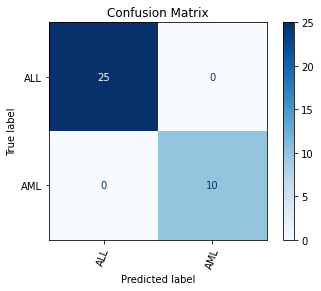

In [ ]:
train_df_features = train_df_sorted.apply(lambda x: (x - x.mean()) / x.std(), axis=1).rename_axis(index=None)
train_df_features_2 = train_df_features.head(1).append(train_df_features.tail(1)).T # How far each gene is far from the mean of each probe
train_df_features_2['label'] = pd.Series(SAMPLES).astype('category')
train_df_features_2['label_codes'] = train_df_features_2["label"].cat.codes
train_df_features_2[["label", 'label_codes']]

X_train, X_test, y_train, y_test = train_test_split(
    train_df_features_2.drop(columns=['label', 'label_codes']), 
    train_df_features_2['label_codes'], 
    test_size=0.92, 
    random_state=42)

lr = LogisticRegression(random_state=0, solver='lbfgs')
clf = lr.fit(X_train, y_train)
pred = clf.predict(X_test)
y_scores = clf.decision_function(X_test)
#print('Predicted Class:\t', pred)
#print('Actual Class: \t\t', y_test.to_numpy())

disp_2 = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=train_df_features_2['label'].cat.categories,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp_2.ax_.set_title('Confusion Matrix')
disp_2.ax_.grid(False)
disp_2.ax_.tick_params(axis='x', rotation=70)

_ = disp_2.confusion_matrix


loo = LeaveOneOut()

loo.get_n_splits(train_df_features_2)

max_probs = []

for train_index, test_index in loo.split(train_df_features_2):
    # split the data into train and test sets using the indicies
    train_df_features_2, 
    train_df_features_2
    X_train = train_df_features_2.iloc[train_index].drop(columns=['label', 'label_codes'])
    X_test = train_df_features_2.iloc[test_index].drop(columns=['label', 'label_codes'])
    y_train = train_df_features_2.iloc[train_index]['label_codes']
    y_test = train_df_features_2.iloc[test_index]['label_codes']
    
    # Create a new model each time so that the weights are reset each iteration 
    lr = LogisticRegression(solver='lbfgs')
    # train the model using the training set
    clf = lr.fit(X_train, y_train)
    # print the accuracy of the model using the test set
    #print(clf.score(X_test, y_test), end=', ')
    # this will output the probilites per test case
    #   as we only have one test we can use zero to index it
    max_probs.append(max(clf.predict_proba(X_test)[0]))

probs_2 = max_probs

## 10 genes

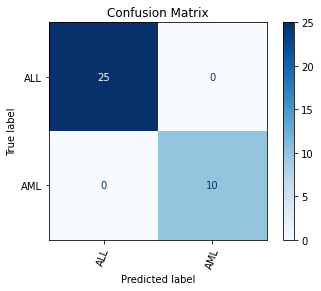

In [ ]:
train_df_features = train_df_sorted.apply(lambda x: (x - x.mean()) / x.std(), axis=1).rename_axis(index=None)
train_df_features_10 = train_df_features.head(5).append(train_df_features.tail(5)).T # How far each gene is far from the mean of each probe
train_df_features_10['label'] = pd.Series(SAMPLES).astype('category')
train_df_features_10['label_codes'] = train_df_features_10["label"].cat.codes
train_df_features_10[["label", 'label_codes']]

X_train, X_test, y_train, y_test = train_test_split(
    train_df_features_10.drop(columns=['label', 'label_codes']), 
    train_df_features_10['label_codes'], 
    test_size=0.92, 
    random_state=42)

lr = LogisticRegression(random_state=0, solver='lbfgs')
clf = lr.fit(X_train, y_train)
pred = clf.predict(X_test)
y_scores = clf.decision_function(X_test)
#print('Predicted Class:\t', pred)
#print('Actual Class: \t\t', y_test.to_numpy())

disp_10 = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=train_df_features_10['label'].cat.categories,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp_10.ax_.set_title('Confusion Matrix')
disp_10.ax_.grid(False)
disp_10.ax_.tick_params(axis='x', rotation=70)

_ = disp_10.confusion_matrix


loo = LeaveOneOut()

loo.get_n_splits(train_df_features_10)

max_probs = []

for train_index, test_index in loo.split(train_df_features_10):
    # split the data into train and test sets using the indicies
    train_df_features_10, 
    train_df_features_10
    X_train = train_df_features_10.iloc[train_index].drop(columns=['label', 'label_codes'])
    X_test = train_df_features_10.iloc[test_index].drop(columns=['label', 'label_codes'])
    y_train = train_df_features_10.iloc[train_index]['label_codes']
    y_test = train_df_features_10.iloc[test_index]['label_codes']
    
    # Create a new model each time so that the weights are reset each iteration 
    lr = LogisticRegression(solver='lbfgs')
    # train the model using the training set
    clf = lr.fit(X_train, y_train)
    # print the accuracy of the model using the test set
    #print(clf.score(X_test, y_test), end=', ')
    # this will output the probilites per test case
    #   as we only have one test we can use zero to index it
    max_probs.append(max(clf.predict_proba(X_test)[0]))

probs_10 = max_probs

## 100 genes

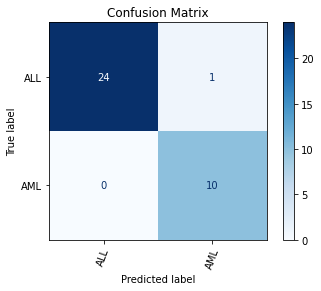

In [ ]:
train_df_features = train_df_sorted.apply(lambda x: (x - x.mean()) / x.std(), axis=1).rename_axis(index=None)
train_df_features_100 = train_df_features.head(50).append(train_df_features.tail(50)).T # How far each gene is far from the mean of each probe
train_df_features_100['label'] = pd.Series(SAMPLES).astype('category')
train_df_features_100['label_codes'] = train_df_features_100["label"].cat.codes
train_df_features_100[["label", 'label_codes']]

X_train, X_test, y_train, y_test = train_test_split(
    train_df_features_100.drop(columns=['label', 'label_codes']), 
    train_df_features_100['label_codes'], 
    test_size=0.92, 
    random_state=42)

lr = LogisticRegression(random_state=0, solver='lbfgs')
clf = lr.fit(X_train, y_train)
pred = clf.predict(X_test)
y_scores = clf.decision_function(X_test)
#print('Predicted Class:\t', pred)
#print('Actual Class: \t\t', y_test.to_numpy())

disp_100 = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=train_df_features_100['label'].cat.categories,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp_100.ax_.set_title('Confusion Matrix')
disp_100.ax_.grid(False)
disp_100.ax_.tick_params(axis='x', rotation=70)

_ = disp_100.confusion_matrix


loo = LeaveOneOut()

loo.get_n_splits(train_df_features_100)

max_probs = []

for train_index, test_index in loo.split(train_df_features_100):
    # split the data into train and test sets using the indicies
    train_df_features_100, 
    train_df_features_100
    X_train = train_df_features_100.iloc[train_index].drop(columns=['label', 'label_codes'])
    X_test = train_df_features_100.iloc[test_index].drop(columns=['label', 'label_codes'])
    y_train = train_df_features_100.iloc[train_index]['label_codes']
    y_test = train_df_features_100.iloc[test_index]['label_codes']
    
    # Create a new model each time so that the weights are reset each iteration 
    lr = LogisticRegression(solver='lbfgs')
    # train the model using the training set
    clf = lr.fit(X_train, y_train)
    # print the accuracy of the model using the test set
    #print(clf.score(X_test, y_test), end=', ')
    # this will output the probilites per test case
    #   as we only have one test we can use zero to index it
    max_probs.append(max(clf.predict_proba(X_test)[0]))

probs_100 = max_probs

## 1000 genes

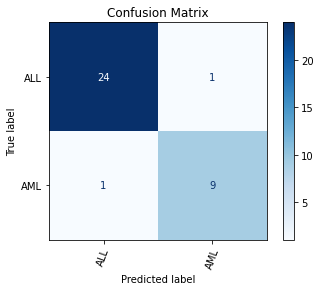

In [ ]:
train_df_features = train_df_sorted.apply(lambda x: (x - x.mean()) / x.std(), axis=1).rename_axis(index=None)
train_df_features_1000 = train_df_features.head(500).append(train_df_features.tail(500)).T # How far each gene is far from the mean of each probe
train_df_features_1000['label'] = pd.Series(SAMPLES).astype('category')
train_df_features_1000['label_codes'] = train_df_features_1000["label"].cat.codes
train_df_features_1000[["label", 'label_codes']]

X_train, X_test, y_train, y_test = train_test_split(
    train_df_features_1000.drop(columns=['label', 'label_codes']), 
    train_df_features_1000['label_codes'], 
    test_size=0.92, 
    random_state=42)

lr = LogisticRegression(random_state=0, solver='lbfgs')
clf = lr.fit(X_train, y_train)
pred = clf.predict(X_test)
y_scores = clf.decision_function(X_test)
#print('Predicted Class:\t', pred)
#print('Actual Class: \t\t', y_test.to_numpy())

disp_1000 = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=train_df_features_1000['label'].cat.categories,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp_1000.ax_.set_title('Confusion Matrix')
disp_1000.ax_.grid(False)
disp_1000.ax_.tick_params(axis='x', rotation=70)

_ = disp_1000.confusion_matrix


loo = LeaveOneOut()

loo.get_n_splits(train_df_features_1000)

max_probs = []

for train_index, test_index in loo.split(train_df_features_1000):
    # split the data into train and test sets using the indicies
    train_df_features_1000, 
    train_df_features_1000
    X_train = train_df_features_1000.iloc[train_index].drop(columns=['label', 'label_codes'])
    X_test = train_df_features_1000.iloc[test_index].drop(columns=['label', 'label_codes'])
    y_train = train_df_features_1000.iloc[train_index]['label_codes']
    y_test = train_df_features_1000.iloc[test_index]['label_codes']
    
    # Create a new model each time so that the weights are reset each iteration 
    lr = LogisticRegression(solver='lbfgs')
    # train the model using the training set
    clf = lr.fit(X_train, y_train)
    # print the accuracy of the model using the test set
    #print(clf.score(X_test, y_test), end=', ')
    # this will output the probilites per test case
    #   as we only have one test we can use zero to index it
    max_probs.append(max(clf.predict_proba(X_test)[0]))

probs_1000 = max_probs

## Comparison Across Predictive Strengths

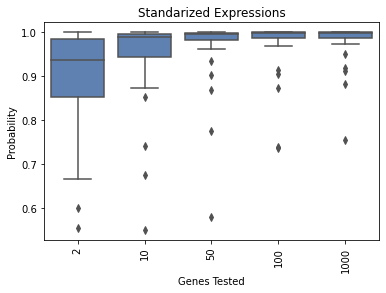

In [ ]:
gene_prob = pd.DataFrame({'2': probs_2, '10': probs_10, '50': probs_50, '100': probs_100, '1000':probs_1000})

sns.boxplot(data=gene_prob, color='#507fbf')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Genes Tested')
_ = plt.ylabel('Probability')
_ = plt.title('Standarized Expressions')

# Clustering

In [53]:
import numpy as np
import os
import pandas as pd

from sklearn.cluster import KMeans, AgglomerativeClustering

In [54]:
cluster_df = train_df[['Gene Accession Number',
            '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
            '16','17','18','19','20','21','22','23','24','25','26','27','28',
            '29','30','31','32','33','34','35','36','37','38'
           ]].set_index("Gene Accession Number")
cluster_df= cluster_df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

cluster_df = cluster_df.T
cluster_df['type'] = pd.Series(SAMPLES).astype('category')
cluster_df['type_codes'] = cluster_df["type"].cat.codes
cluster_df.head()


Gene Accession Number,hum_alu_at,A28102_at,AB000115_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000464_at,AB000468_at,AB000905_at,AB001106_at,AB001325_at,AB002315_at,AB002559_at,AB003102_at,AB003103_at,AB003177_at,AB003698_at,AB004884_at,AB006190_at,AC000064_cds1_at,AC000064_cds2_at,AC000099_at,AC002045_xpt1_at,AC002115_cds1_at,AC002115_cds3_at,AC002115_rna2_at,AC002486_at,AF000177_at,AF000231_at,AF002020_at,AF005043_at,AF005775_at,AF006084_at,AF006087_at,AF007111_at,AF007875_at,AF008445_at,AF008937_at,AF009301_at,...,U88898_r_at,D32129_f_at,HG1515-HT1515_f_at,HG2915-HT3059_f_at,HG2917-HT3061_f_at,J00212_f_at,K02405_f_at,L02326_f_at,L42601_f_at,L42611_f_at,L76568_xpt3_f_at,M33600_f_at,M37755_f_at,M60750_f_at,M90356_f_at,U10690_f_at,U49974_f_at,V01516_f_at,X13930_f_at,X53065_f_at,X67491_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,HG658-HT658_f_at,M94880_f_at,X03068_f_at,D64015_at,L10717_at,L78833_cds4_at,M21064_at,M93143_at,U29175_at,U48730_at,X06956_at,M71243_f_at,type,type_codes
1,4.333933,-0.409755,-0.368478,-0.552637,-0.439601,-0.398642,0.065249,-0.202734,-0.337679,-0.408485,-0.344981,-0.092874,-0.407532,-0.216705,-0.282748,-0.446904,-0.271000,-0.416740,-0.099542,-0.165902,-0.371653,-0.432933,-0.379908,-0.435473,0.252266,-0.226231,-0.342759,-0.351967,-0.488499,-0.404039,-0.440554,-0.437061,-0.314500,-0.079856,-0.340219,-0.352919,-0.375145,-0.418328,-0.350062,-0.366255,...,0.134468,1.802379,0.440553,1.933513,1.965582,-0.332281,0.409119,-0.238296,-0.320533,-0.045246,-0.143676,3.840513,-0.170348,-0.081761,-0.401817,-0.379591,-0.437696,-0.302752,-0.297672,-0.333551,-0.403087,-0.349427,-0.207497,6.276813,3.914812,-0.267825,4.138661,2.997508,0.419279,-0.384988,-0.423408,-0.346887,-0.371018,-0.335773,0.044611,-0.398959,-0.334186,-0.397054,ALL,0
2,2.738356,-0.378563,-0.382324,-0.484437,-0.405755,-0.391291,0.136343,-0.235952,-0.382613,-0.416747,-0.329965,-0.182436,-0.359761,0.024394,-0.240869,-0.443939,-0.228720,-0.401995,-0.181568,-0.235084,-0.282525,-0.413565,-0.418483,-0.402573,1.049000,-0.300460,-0.342693,-0.417615,-0.353975,-0.434104,-0.420797,-0.428029,-0.267482,-0.204132,-0.030568,-0.442203,-0.349925,-0.435839,-0.323601,-0.427161,...,-0.217438,3.762962,0.759438,1.988270,1.698997,-0.375960,-0.231323,-0.178965,-0.304799,-0.193428,-0.380010,0.505456,-0.251862,0.091216,-0.392159,-0.340669,-0.410383,-0.304799,-0.327362,-0.396788,-0.410094,-0.329387,-0.241737,5.637163,3.912516,-0.291781,3.504351,2.955600,-0.001351,-0.398523,-0.366992,-0.392738,-0.413276,-0.387820,-0.274136,-0.405755,-0.326783,-0.432657,ALL,0
3,4.473594,-0.440471,-0.360563,-0.424489,-0.360267,-0.396373,0.124511,0.277520,-0.359379,-0.386607,-0.288053,0.102906,-0.377432,-0.132084,-0.204593,-0.424785,-0.157536,-0.341325,-0.164935,-0.164935,-0.331263,-0.405844,-0.429816,-0.439287,0.795148,-0.182397,-0.275327,-0.362338,-0.422122,-0.439287,-0.414723,-0.418274,-0.217319,-0.049808,-0.071709,-0.339846,-0.348132,-0.496703,-0.378616,-0.438991,...,-0.054247,1.085778,0.672918,0.535298,0.502743,-0.306698,-0.404956,-0.224422,-0.328007,-0.086803,-0.338662,-0.303147,-0.182101,-0.199266,-0.416794,-0.353164,-0.420050,-0.340437,-0.263193,-0.351980,-0.413243,-0.291605,-0.182693,6.722866,4.676621,0.068575,1.474961,1.020076,-0.143922,-0.379504,-0.424193,-0.329191,-0.396077,-0.253426,-0.243660,-0.373289,-0.416794,-0.399037,ALL,0
4,4.369789,-0.276942,-0.388252,-0.427484,-0.340808,-0.349628,0.223040,0.028704,-0.343241,-0.389164,-0.346586,-0.096291,-0.351757,-0.101157,-0.225240,-0.396767,-0.225849,-0.379432,-0.149209,-0.237405,-0.298231,-0.380953,-0.394030,-0.378520,0.513480,-0.218854,-0.334726,-0.390989,-0.383081,-0.397375,-0.352669,-0.381865,-0.262648,-0.135828,-0.256261,-0.287586,-0.314349,-0.444819,-0.301576,-0.380953,...,0.038436,1.637527,0.772595,1.173128,1.309376,-0.308571,-0.003533,0.299984,-0.293365,0.074931,-0.302488,0.649120,-0.157116,-0.071049,-0.314653,-0.356318,-0.396767,-0.261735,-0.309787,-0.327731,-0.325298,-0.371525,-0.293060,4.915693,3.778265,-

In [55]:
# extract the expression levels as features from the dataframe
features = cluster_df.drop(columns=['type', 'type_codes']).values
labels = cluster_df['type_codes'].values
print('features:', features.shape)
print('labels:', labels.shape)

features: (38, 3026)
labels: (38,)


In [56]:
kmeans2 = KMeans(n_clusters=2, random_state=123454321).fit(features)
print('Clustering Labels:\t', kmeans2.labels_)
print('Actual Labels:\t\t', labels)
print('Testing Accuracy:\t', sum(kmeans2.labels_ == labels)/len(kmeans2.labels_))

Clustering Labels:	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1
 1]
Actual Labels:		 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1]
Testing Accuracy:	 0.868421052631579


In [57]:
# Creation of 3 cluster vectors.

SAMPLES_T_B = SAMPLES

for key in [str(x) for x in list(range(1,28))]:
    SAMPLES_T_B[key] ='B ALL'

for key in ['2','3','6','9','10','11','14','23']:
    SAMPLES_T_B[key] ='T ALL'

y = pd.DataFrame()
y['label'] = pd.Series(SAMPLES_T_B).astype('category')
y['label_codes'] = y['label'].cat.codes

labels_three_groups = np.asarray(y['label_codes'])

In [58]:
kmeans3 = KMeans(n_clusters=3, random_state=123454321).fit(features)
print('Clustering Labels:\t', kmeans3.labels_)
print('Actual Labels:\t\t', labels_three_groups)
print('Testing Accuracy:\t', sum(kmeans3.labels_ == np.asarray(y['label_codes']))/len(kmeans3.labels_))

Clustering Labels:	 [1 1 2 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1]
Actual Labels:		 [1 2 2 1 1 2 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0]
Testing Accuracy:	 0.7631578947368421


In [59]:
# The same process but with a different clustering model
clustering = AgglomerativeClustering(n_clusters=2).fit(features)
print('Clustering Labels:\t', clustering.labels_)
print('Actual Labels:\t\t', labels)
print('Testing Accuracy:\t', sum(clustering.labels_ == labels)/len(clustering.labels_))

Clustering Labels:	 [0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
Actual Labels:		 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1]
Testing Accuracy:	 0.5526315789473685


In [60]:
# The same process but with a different clustering model
clustering = AgglomerativeClustering(n_clusters=3).fit(features)
print('Clustering Labels:\t', clustering.labels_)
print('Actual Labels:\t\t', labels)
print('Testing Accuracy:\t', sum(clustering.labels_ == labels)/len(clustering.labels_))

Clustering Labels:	 [0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 2 0 0 2 2
 0]
Actual Labels:		 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1]
Testing Accuracy:	 0.5526315789473685


In [61]:
train_df_features

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
U22376_cds2_s_at,0.139316,-0.914159,0.698193,1.274115,0.222317,0.254563,0.531982,0.912987,0.330830,-0.556959,-0.032919,-0.983290,0.844537,-0.672532,1.050283,0.704837,1.712345,-0.727509,0.345446,1.330226,2.705129,1.040443,0.191705,1.366967,-0.452644,0.217583,0.088406,-1.040960,-0.674434,-1.230193,-1.167610,-0.937450,-1.290679,-0.838360,-0.844837,-1.242005,-1.320690,-1.034979
X59417_at,-0.119281,-0.067639,1.778819,0.223069,0.740375,0.399411,0.956302,-0.534043,1.593129,0.792040,1.334994,-0.961684,1.855308,-0.714647,1.580842,1.192443,-0.587151,-0.817647,1.442973,1.287860,0.889443,-1.049474,-0.304906,0.172482,0.233667,-0.009466,-0.581506,-0.968168,-0.707364,-0.844784,-0.661374,-0.977113,-0.845678,-1.104819,-1.123027,-0.863755,-1.254188,-1.375444
X74262_at,0.348433,-0.019409,1.217747,0.011791,0.269018,0.485304,0.443748,-0.433004,2.523834,0.096308,-0.139098,-0.694556,0.556771,1.147017,0.927967,0.718001,1.947152,0.012801,0.679135,2.760105,-0.184713,-0.800275,0.041424,0.323228,-0.572127,-0.357353,-0.425090,-0.659538,-0.673617,-1.104716,-0.908253,-1.045865,-1.434020,-0.923314,-0.546853,-1.244582,-1.201193,-1.142210
D26156_s_at,0.939374,-0.730475,0.401672,-0.783167,-0.296531,1.218783,-0.782618,-0.013505,-0.221994,-0.054548,1.528361,-0.884399,0.756230,-0.219236,0.955991,1.896607,0.519297,-0.247723,0.982316,0.713955,-0.326602,0.885400,2.125166,0.079186,-0.464448,2.125089,0.698062,-0.507925,-0.504391,-1.609076,-1.144296,-0.917892,-0.942886,-1.421090,-1.123565,-1.151393,-0.883966,-0.593760
M91432_at,0.035488,0.001946,1.411598,0.321797,1.296768,-0.178325,0.332504,0.235160,1.464284,-0.334146,-0.430043,-0.656565,0.243052,-0.244686,1.129979,0.402665,1.830972,0.917867,-0.023070,3.362125,0.680727,-0.774377,-0.254276,0.440857,-0.434846,0.002252,-0.108074,-0.869189,-0.711783,-1.355814,-0.698661,-0.851619,-1.424318,-0.795139,-0.354020,-1.484801,-1.118907,-1.007376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X17042_at,-0.955665,0.034356,-0.894971,-0.854778,1.462902,-0.742039,-0.825844,-0.920443,-0.810395,-0.612759,-0.563549,0.759856,-0.259255,-0.207450,-0.368523,-0.588455,-0.741914,-0.534175,-0.455660,-1.088830,-0.370688,-0.797458,-0.849405,-0.478432,0.191180,-0.412683,-0.822183,1.416037,1.771964,2.240521,0.866697,-0.005163,1.661105,1.652606,0.181748,1.983655,1.509349,-0.571263
M16038_at,-0.631457,-0.342566,-1.027395,0.150508,-0.214311,-0.383505,-0.454819,-0.609272,-0.983924,-0.675649,-0.936239,-0.112600,-0.776163,-0.286743,-0.098082,-0.598447,-0.761466,-0.060538,-0.757235,-0.928977,-0.196494,-0.386766,-0.665660,-0.440448,-0.777821,-0.583585,-0.096709,-0.215877,0.899414,2.101335,0.384562,2.267132,2.836264,1.159719,0.278114,2.002454,1.851399,0.071845
M62762_at,-0.898086,1.089891,-1.195384,-0.730589,-0.141612,-1.003530,-0.825867,-0.328988,-0.321811,-0.431898,0.124422,-0.383236,-0.330998,-0.829443,-0.551961,-1.056446,0.195735,-0.945335,-0.727149,-0.003430,-0.127643,0.461725,-0.774131,-0.542699,-0.659651,-0.522976,-1.438962,0.826785,0.163128,1.433472,1.504055,2.254962,-0.038172,1.420613,-0.346527,2.238898,1.737199,1.705638
X95735_at,-0.636410,-0.643039,-0.665242,-0.276263,-0.330915,-0.484401,-0.681104,-0.903705,-1.119914,-0.364327,-0.798958,-0.286316,-0.345659,-0.554832,-0.225017,-0.161462,-0.389991,-0.373041,-0.238484,-0.616115,-0.588080,-0.531636,-0.687849,-0.689550,-0.209620,-0.438018,-1.112726,0.743171,1.704259,3.362660,0.362780,1.487252,1.549631,1.327014,0.141121,2.293464,0.958786,0.422537


## Feature Scaling - Standarization

In [62]:
from sklearn import preprocessing

X = train_df_features_100.drop(columns=['label', 'label_codes'])

std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

## PCA Dimensionally Reduction

In [63]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)


# om standardized data
pca_std = PCA(n_components=2).fit(X_std)
X_std = pca_std.transform(X_std)

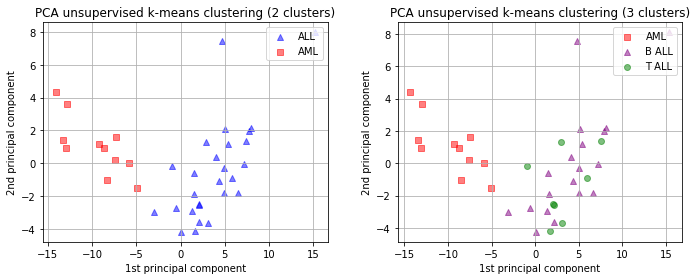

In [64]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(0,3), ('blue', 'red'), ('^', 's')):
    ax1.scatter(X[labels==l][:,0], X[labels==l][:,1],
        color=c,
        label='class %s' %1,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(0,3), ('red', 'purple', 'green'), ('s','^','o')):
    ax2.scatter(X_std[labels_three_groups==l][:,0], X_std[labels_three_groups==l][:,1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('PCA unsupervised k-means clustering (2 clusters)')    
ax2.set_title('PCA unsupervised k-means clustering (3 clusters)')    

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')

    ax.grid()
plt.tight_layout()

ax1.legend(loc='upper right', labels=['ALL', 'AML'])
ax2.legend(loc='upper right', labels = ['AML', 'B ALL', 'T ALL'])

plt.show()